In [108]:
# input the years for which you want to access the data
years = [1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999] 

In [109]:
# url for the chicago bulls team 
url_start = "https://www.basketball-reference.com/teams/CHI/{}.html"

In [110]:
# # gets you the data and stores it in the Storage file 
# import requests

# for year in years: 
#     url = url_start.format(year)
#     data = requests.get(url)
#     f = open("Storage/{}.html".format(year), "w+", encoding="utf-8")
#     f.write(data.text)
# # Uncomment only when years changes

In [111]:
# select dataframe based on the title 
# Adding a year column so we know which year it is 
pergame_table = []
import pandas as pd 
from bs4 import BeautifulSoup

for i in years:
    with open("Storage/{}.html".format(i), encoding = "utf-8") as f: 
        page = f.read()
        soup = BeautifulSoup(page, "html.parser") # creates a parser class that will help us extract the html code from the page
        pergame = soup.find(id="per_game")
        pd.read_html(str(pergame))[0]
        df = pd.read_html(str(pergame))[0]
        df.insert(0, "Year", i)
        pergame_table.append(df)

In [115]:
# Code to find the year that is required 
reqYear = 1990

for i in pergame_table: 
    yr = i["Year"][0]
    if yr == reqYear: 
        print("Found")

In [76]:

def FindStats(df): 
    names = df["Unnamed: 1"]
    FG = df["FG"]
    Assist = df["AST"]
    pointsPerGame = df["PTS/G"]
    year = df["Year"]
    dict = {"Year": year, "Names": names, "Field Goals": FG, "Assists": Assist, "pointsPerGame":pointsPerGame}
    
    return pd.DataFrame(dict)

In [116]:
pg = FindStats(pergame_table[0])
fg = pg["Field Goals"]
names = pg["Names"]
assist = pg["Assists"]
ppg = pg["pointsPerGame"]

C:\Users\birat\AppData\Local\Temp\ipykernel_15428\261191277.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names, rotation = 90)


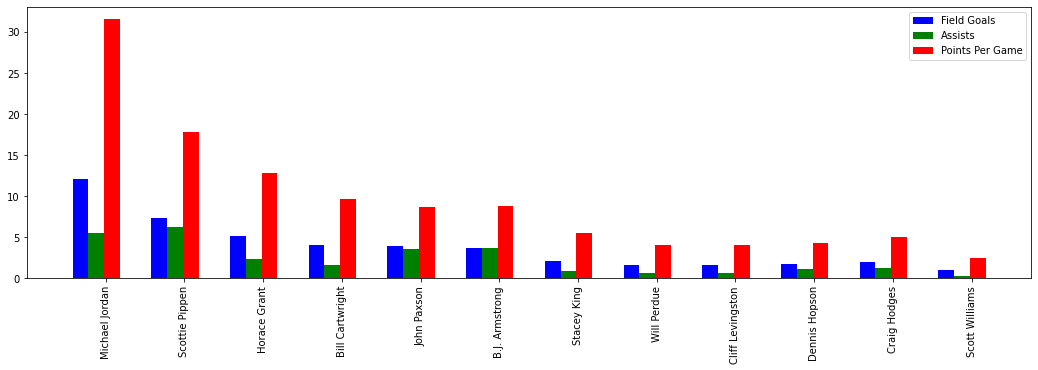

In [117]:
# Lets me plot the graph in a way that I can represt the data for the people quite easily

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(fg)) 
x = x -1

f, ax = plt.subplots(figsize=(18,5))

ax.bar(x-0.2, fg, width=0.2, color='b', align='center', label = "Field Goals")
ax.bar(x, assist, width=0.2, color='g', align='center', label = "Assists")
ax.bar(x+0.2, ppg, width=0.2, color='r', align='center', label = "Points Per Game")
ax.set_xticklabels(names, rotation = 90)
start, end = ax.get_xlim()
stepsiassiste = 1
ax.xaxis.set_ticks(np.arange(start + 1, end, stepsiassiste))

ax.legend()

In [118]:
df = pergame_table[2]
df

,Year,Rk,Unnamed: 1,Age,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS/G
0,1993,1,Michael Jordan,29,78,78,39.3,12.7,25.7,0.495,...,0.837,1.7,5.0,6.7,5.5,2.8,0.8,2.7,2.4,32.6
1,1993,2,Scottie Pippen,27,81,81,38.6,7.8,16.4,0.473,...,0.663,2.5,5.2,7.7,6.3,2.1,0.9,3.0,2.7,18.6
2,1993,3,Horace Grant,27,77,77,35.6,5.5,10.8,0.508,...,0.619,4.4,5.0,9.5,2.6,1.2,1.2,1.4,2.8,13.2
3,1993,4,B.J. Armstrong,25,82,74,30.4,5.0,10.0,0.499,...,0.861,0.3,1.5,1.8,4.0,0.8,0.1,1.0,2.1,12.3
4,1993,5,Bill Cartwright,35,63,63,19.9,2.2,5.4,0.411,...,0.735,1.3,2.4,3.7,1.3,0.3,0.2,1.0,2.4,5.6
5,1993,6,Scott Williams,24,71,5,19.3,2.3,5.0,0.466,...,0.714,2.4,4.0,6.4,1.0,0.8,0.9,1.0,3.2,5.9
6,1993,7,John Paxson,32,59,8,17.5,1.8,3.9,0.451,...,0.850,0.2,0.7,0.8,2.3,0.6,0.0,0.5,1.7,4.2
7,1993,8,Rodney McCray,31,64,5,15.9,1.4,3.2,0.451,...,0.692,0.8,1.6,2.5,1.3,0.2,0.2,0.8,1.5,3.5
8,1993,9,Stacey King,26,76,3,13.9,2.1,4.5,0.471,...,0.705,1.4,1.3,2.7,0.9,0.3,0.3,0.9,1.7,5.4
9,1993,10,Will Perdue,27,72,16,13.9,1.9,3.4,0.557,...,0.604,1.4,2.6,4.0,1.0,0.3,0.7,1.0,1.9,4.7


In [129]:
# Lets plot the data where it's easy 
from lib2to3.pgen2.token import NAME


def PlayerData(name, pergame_table): # Takes in the player name and a list of dataframes
   pg = pergame_table[0]
   res = pg.loc[pg['Unnamed: 1'] == name]
   for i in range(1, len(pergame_table)):
      pg = pergame_table[i]
      a = pg.loc[pg['Unnamed: 1'] == name]
      res = pd.concat([res, a])
   return res

mj = PlayerData("Michael Jordan", pergame_table)
sp = PlayerData("Scottie Pippen", pergame_table)

n = pergame_table[0]
NameList = n["Unnamed: 1"]

playerlist = []
for i in NameList: 
   playerlist.append(PlayerData(str(i), pergame_table))

In [133]:
Years = []
fg = []
names = []
assist = []
ppg = []
for i in playerlist: 
    pg = FindStats(i)
    Years.append(pg["Year"])
    fg.append(pg["Field Goals"])
    names.append(pg["Names"])
    assist.append(pg["Assists"])
    ppg.append(pg["pointsPerGame"])


Index(['Year', 'Names', 'Field Goals', 'Assists', 'pointsPerGame'], dtype='object')
Index(['Year', 'Names', 'Field Goals', 'Assists', 'pointsPerGame'], dtype='object')
Index(['Year', 'Names', 'Field Goals', 'Assists', 'pointsPerGame'], dtype='object')
Index(['Year', 'Names', 'Field Goals', 'Assists', 'pointsPerGame'], dtype='object')
Index(['Year', 'Names', 'Field Goals', 'Assists', 'pointsPerGame'], dtype='object')
Index(['Year', 'Names', 'Field Goals', 'Assists', 'pointsPerGame'], dtype='object')
Index(['Year', 'Names', 'Field Goals', 'Assists', 'pointsPerGame'], dtype='object')
Index(['Year', 'Names', 'Field Goals', 'Assists', 'pointsPerGame'], dtype='object')
Index(['Year', 'Names', 'Field Goals', 'Assists', 'pointsPerGame'], dtype='object')
Index(['Year', 'Names', 'Field Goals', 'Assists', 'pointsPerGame'], dtype='object')
Index(['Year', 'Names', 'Field Goals', 'Assists', 'pointsPerGame'], dtype='object')
Index(['Year', 'Names', 'Field Goals', 'Assists', 'pointsPerGame'], dtype='o

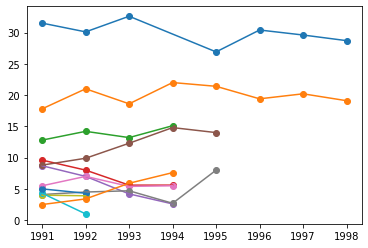

In [135]:
for k in range(len(playerlist)): 
    plt.scatter(Years[k], ppg[k], label = names[k])
    plt.plot(Years[k], ppg[k])
